Self contained example (with accompaning data) how to run and plot output from EventTracker.

1. data will be a fft cube of (time, channels, frequency)
2. select a single channel for simplicity of example
3. track it over time

In [14]:
import numpy as np
import RatioEventTracker
import matplotlib.pyplot as plt
from datetime import datetime, timezone
import csv
import pandas as pd

In [12]:
def append_list_to_csv(filename, data_list):
    with open(filename, "a", newline="") as csvfile:
        writer = csv.writer(csvfile)

        writer.writerow(data_list)

# Loading data

Already preprocessed fft from Jordan C7 on 21-Sept

In [2]:
data = np.load(
    "/mnt/g/2_data_organization_jordan/10_misc/8_chamber_intrusion/21-sept/coil_tempering_fft100_jordan_c7.npy"
)  # data is in 10:510 Hz
data.shape

(2700, 100, 500)

Text(0, 0.5, 'Time')

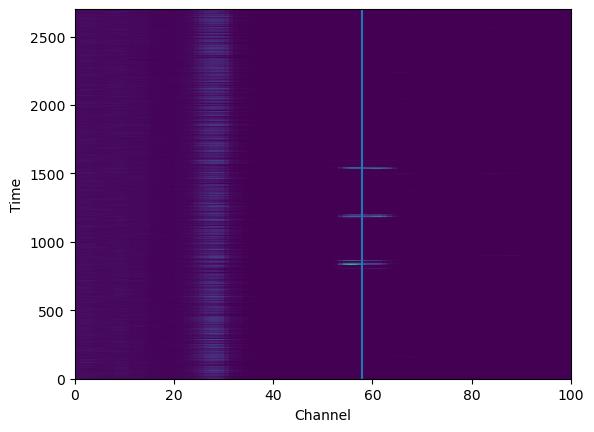

In [ ]:
plt.pcolormesh(data.sum(2))
plt.axvline(x=58)
plt.xlabel("Channel")
plt.ylabel("Time")

# Running class

In [5]:
tracker = RatioEventTracker.EventTracker(
    sta_win=1,
    lta_win=100,
    threshold=8,
    alarm_window_seconds=60,
    alarm_event_count=3,
    duration_threshold_seconds=10,
)

In [ ]:
channel_to_run = 58  # channel that we will be tracking

In [ ]:
data_in = data[:, channel_to_run, :].sum(
    1
)  # just selectiong specific channel and summing energy
data_in.shape

(2700,)

In [ ]:
output_filename = "test.csv"

for second in data_in:
    process_timestamp = datetime.now(timezone.utc)

    results = tracker.process_chunk(second, process_timestamp, channel_to_run)
    log_data = [
        channel_to_run,
        process_timestamp,
        results["sta"],
        results["lta"],
        results["ratio"],
        results["event"],
        results["alarm"],
    ]
    append_list_to_csv(output_filename, log_data)

2025-10-03 12:46:44 [info     ] Event detected at 58. (Ratio: 22.44).
2025-10-03 12:46:44 [info     ] Event detected at 58. (Ratio: 8.98).
2025-10-03 12:46:44 [info     ] Event detected at 58. (Ratio: 27.19).
2025-10-03 12:46:44 [info     ] !!! EVENT COUNT ALARM !!! 
 3 events occurred in the last 60 seconds
2025-10-03 12:46:44 [info     ] ALARM MEMORY WIPED. Tracking restarted.
2025-10-03 12:46:44 [info     ] Event detected at 58. (Ratio: 31.58).
2025-10-03 12:46:44 [info     ] Event detected at 58. (Ratio: 8.69).
2025-10-03 12:46:44 [info     ] Event detected at 58. (Ratio: 11.91).
2025-10-03 12:46:44 [info     ] !!! EVENT COUNT ALARM !!! 
 3 events occurred in the last 60 seconds
2025-10-03 12:46:44 [info     ] ALARM MEMORY WIPED. Tracking restarted.
2025-10-03 12:46:44 [info     ] Event detected at 58. (Ratio: 9.65).
2025-10-03 12:46:44 [info     ] Event detected at 58. (Ratio: 10.30).
2025-10-03 12:46:44 [info     ] Event detected at 58. (Ratio: 8.55).
2025-10-03 12:46:44 [info   

# Loading a plotting results

In [27]:
data_results = pd.read_csv(
    "test.csv",
    names=[
        "trigger_channel",
        "timestamp",
        "sta",
        "lta",
        "ratio",
        "event",
        "alarm",
    ],
)
data_results

,trigger_channel,timestamp,sta,lta,ratio,event,alarm
0,58,2025-10-03 11:46:44.017878+00:00,NaN,NaN,NaN,False,False
1,58,2025-10-03 11:46:44.029819+00:00,NaN,NaN,NaN,False,False
2,58,2025-10-03 11:46:44.029878+00:00,NaN,NaN,NaN,False,False
3,58,2025-10-03 11:46:44.029894+00:00,NaN,NaN,NaN,False,False
4,58,2025-10-03 11:46:44.029905+00:00,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...
2695,58,2025-10-03 11:46:44.133447+00:00,2619.835205,3894.385955,0.672721,False,False
2696,58,2025-10-03 11:46:44.133483+00:00,2625.966309,3887.394221,0.675508,False,False
2697,58,2025-10-03 11:46:44.133520+00:00,2595.881836,3890.163186,0.667294,False,False
2698,58,2025-10-03 11:46:44.133554+00:00,2413.661621,3882.420037,0.621690,False,False


Text(0, 0.5, 'Ratio')

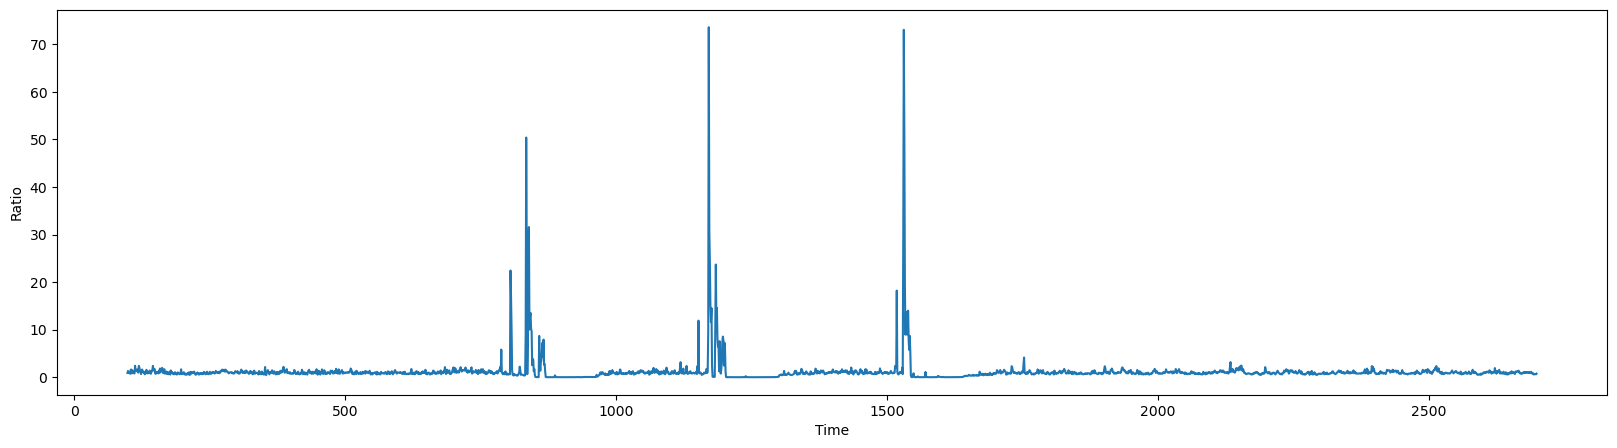

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(data_results.ratio)
plt.xlabel("Time")
plt.ylabel("Ratio")